# Part A. 
Much has been made of the concept of experimenter bias, which refers to the fact that even the most conscientious experimenters tend to collect data that come out in the desired direction (they see what they want to see). Suppose we use students as experimenters. All the experi- menters are told that subjects will be given caffeine before the experiment, but one-half of the experimenters are told that we expect caffeine to lead to good performance and one-half are told that we expect it to lead to poor performance. The dependent variable is the number of simple arithmetic problems the subjects can solve in 2 minutes. The data obtained are:


<img src="files/p22.png" width="500"/>

- Based on these data, what can you conclude?
- Construct 95% confidence limits on the true mean difference between two levels at the two times described above.
- Calculate an effect size for the data.

فرض صفر : سوگیری آزمونگر روی دیتاها تاثیری نگذاشته
فزض 1 :  سوگیری آزمونگر روی دیتاها تاثیری گذاشته

In [5]:
#Load the data
expectation_good <- c(19, 15, 22, 13, 18, 15, 20, 25, 22)
expectation_poor <- c(14, 18, 17, 12, 21, 21, 24, 14)

In [21]:
eg_df <- data.frame(
    eg = c(19, 15, 22, 13, 18, 15, 20, 25, 22)
    )
eg_df

eg
<dbl>
19
15
22
13
18
15
20
25
22


In [22]:
ep_df <- data.frame(
    ep = c(14, 18, 17, 12, 21, 21, 24, 14)
    )
ep_df

ep
<dbl>
14
18
17
12
21
21
24
14


In [17]:
library(magrittr)
library(rstatix)

In [23]:
eg_df %>% get_summary_stats(eg)

variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eg,9,13,25,19,15,22,7,4.448,18.778,3.93,1.31,3.021


In [24]:
ep_df %>% get_summary_stats(ep)

variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ep,8,12,24,17.5,14,21,7,5.189,17.625,4.173,1.475,3.488


In [28]:
eg_df %>% identify_outliers(eg)

eg,is.outlier,is.extreme
<dbl>,<lgl>,<lgl>


In [29]:
ep_df %>% identify_outliers(ep)

ep,is.outlier,is.extreme
<dbl>,<lgl>,<lgl>


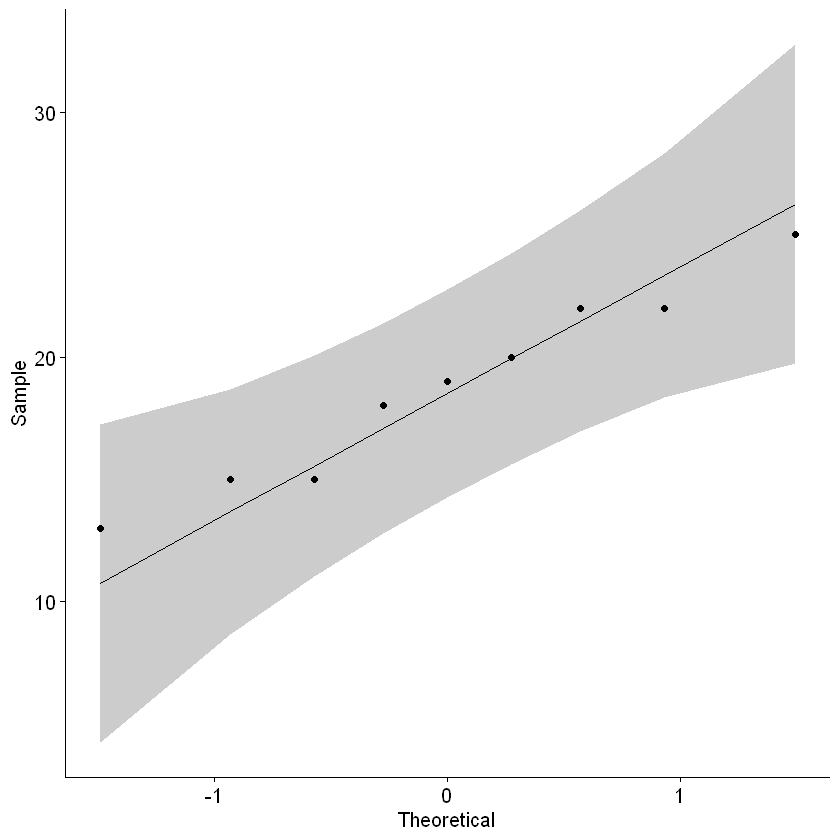

In [30]:
ggqqplot(eg_df,"eg")

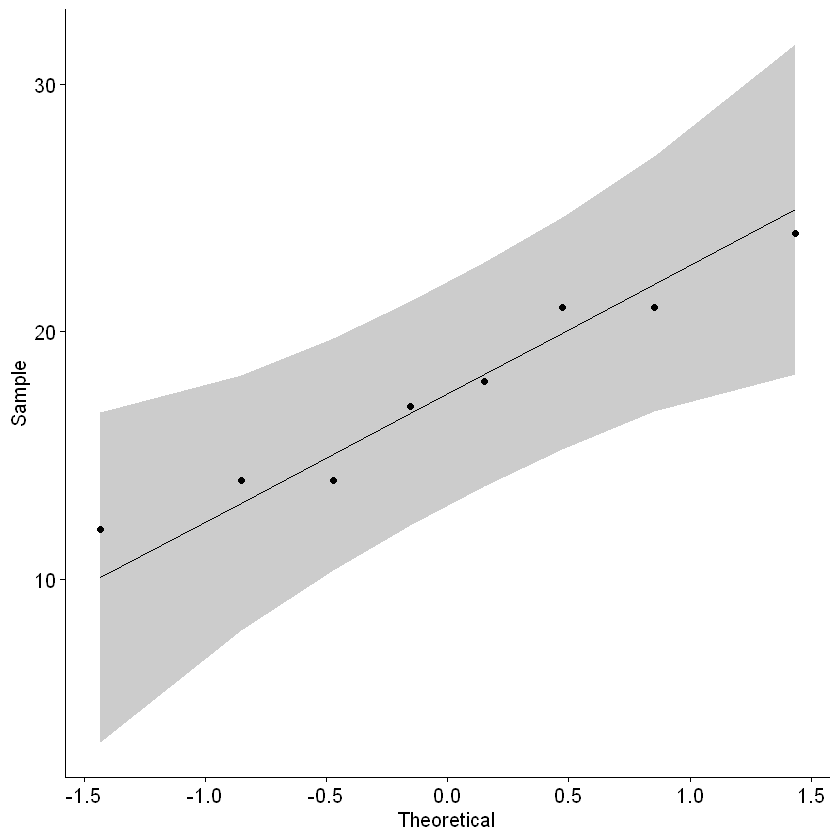

In [31]:
ggqqplot(ep_df,"ep")

In [32]:
eg_df %>% shapiro_test(eg)

variable,statistic,p
<chr>,<dbl>,<dbl>
eg,0.9635849,0.8349957


In [33]:
ep_df %>% shapiro_test(ep)

variable,statistic,p
<chr>,<dbl>,<dbl>
ep,0.9494584,0.7057693


چون مقدار پی در هر دو داده بالاست فرض نرمالیتی برقرار است

In [34]:
t_test_result <- t.test(expectation_good, expectation_poor)
t_test_result



	Welch Two Sample t-test

data:  expectation_good and expectation_poor
t = 0.5843, df = 14.502, p-value = 0.568
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.065004  5.370559
sample estimates:
mean of x mean of y 
 18.77778  17.62500 


مقدار بزرگ پی نشان از عدم رد فرض صفر می دهد. یعنی داده ها نشانگر تاثیر سوگیری آزمونگر نیستند

In [10]:
confidence_intervals <- t.test(expectation_good, expectation_poor, conf.int = TRUE)$conf.int


In [154]:
mean_diff <- mean(expectation_good) - mean(expectation_poor)
pooled_sd <- sqrt(((length(expectation_good)-1)*var(expectation_good) + (length(expectation_poor)-1)*var(expectation_poor))/(length(expectation_good) + length(expectation_poor) - 2))
effect_size <- mean_diff / pooled_sd

In [155]:
cat("\n95% Confidence Intervals for the True Mean Difference:\n")
print(confidence_intervals)

cat("\nEffect size (Cohen's d):\n")
print(effect_size)



95% Confidence Intervals for the True Mean Difference:
[1] 0.3460137 2.5539863
attr(,"conf.level")
[1] 0.95

Effect size (Cohen's d):
[1] 0.2849882



- : مقدار این فاصله اطمینان اعدادی بین 0.3460137 و 2.5539863 است. این به معنی آن است که با اطمینان 95٪، تفاوت میانگین واقعی بین گروه اول و گروه دوم در بازهٔ 0.3460137 تا 2.5539863 قرار دارد.

- اندازه اثر: مقدار آن برابر با 0.2849882 است. مقدار کوچک این معیار نشان می دهد که تفاوت معناداری بین دورگوه وجود ندارد.

به طور کلی، نتیجه ها نشان می دهد که سوگیری آزمونگر در این داده ها تفاوت معناداری ایجاد نکرده.

# Part B.
The Thematic Apperception Test (TAT) presents participants with ambiguous pictures and asks them to tell a story about them. These stories can be scored in any number of ways. Three researchers asked mothers of 20 normal and 20 schizophrenic children to complete the TAT and then scored for the number of stories (out of 10) that exhibited a positive parent–child relationship. The data follow (https://github.com/amanirad/Statistics-in-Cognitive-Sciences):

<img src="files/p3.png" width="400"/>

- What would you assume to be the experimental hypothesis behind this study?
- What would you conclude with respect to that hypothesis?
- Why might it be smart to look at the variances of the two groups?
- A significant difference might lead someone to suggest that poor parent–child relationships are the cause of schizophrenia. Why might this be a troublesome conclusion?
- Calculate the 95% confidence limits on mean1-mean2 for the data. Calculate Cohen’s d^.

In [38]:
#load the data
tat_dat = read.table('project_2_B.dat', header = TRUE)
tat_dat

GROUP,NUMBER
<int>,<int>
1,8
1,4
1,6
1,3
1,1
1,4
1,4
1,6
1,4


In [46]:
library(stringr)
tat_dat$GROUP <- str_replace(tat_dat$GROUP, "1", "N")
tat_dat$GROUP <- str_replace(tat_dat$GROUP, "2", "S")
tat_dat

GROUP,NUMBER
<chr>,<int>
N,8
N,4
N,6
N,3
N,1
N,4
N,4
N,6
N,4


فرض 1: بین میانگین امتیاز در رابطه مثبت والد-کودک بین دو گروه تفاوت وجود دارد (کودکان عادی در مقابل کودکان اسکیزوفرنی)
به طور خاص، انتظار می رود که مادران کودکان عادی در مقایسه با مادران کودکان اسکیزوفرنی در داستان های رابطه مثبت والد-کودکی امتیاز بیشتری کسب می کنند.

فرض 0: بین دو جامعه در امتیاز  رابطه مثبت کودک فرزندی تفاوتی وجود ندارد

In [47]:
library(magrittr)
library(rstatix)

In [56]:
tat_dat %>% group_by(GROUP) %>% get_summary_stats(NUMBER)

GROUP,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N,NUMBER,20,1,8,3.5,2,4,2,1.483,3.55,1.877,0.420,0.879
S,NUMBER,20,0,7,2.0,1,3,2,1.483,2.10,1.553,0.347,0.727


مهم است که به واریانس های دو گروه نگاه کنیم، زیرا تفاوتهای قابل توجه در میانگین ها به تنهایی ممکن است معنی دار نباشد، اگر واریانس ها تفاوت اساسی داشته باشند. واریانس بالا در یک گروه می تواند بر تفسیر نتایج تأثیر بگذارد و ممکن است نشان دهد که عوامل دیگری در تفاوت های مشاهده شده نقش دارند.

نتیجه گیری اینکه روابط ضعیف والد-کودک علت اسکیزوفرنی است که صرفاً بر اساس یک تفاوت قابل توجه در یک مطالعه است، می تواند به دلایل مختلف نتیجه گیری درستی نباشد:

همبستگی در مقابل علیت: یافتن تفاوت معنادار بین دو متغیر لزوماً به معنای رابطه علی نیست. همبستگی به رابطه بین دو متغیر اشاره دارد، اما جهت علیت را تعیین نمی کند. ممکن است عوامل دیگری به طور مستقل هم در روابط ضعیف والدین و هم در ایجاد اسکیزوفرنی نقش داشته باشند.

علیت معکوس: این احتمال وجود دارد که وجود اسکیزوفرنی در کودک منجر به ضعف روابط والدین و فرزند شود. چالش های مرتبط با تربیت کودک مبتلا به اسکیزوفرنی، مانند مشکلات ارتباطی یا مشکلات رفتاری، ممکن است روابط والد-کودک را تحت تاثیر قرار دهد. بنابراین، روابط ضعیف والد-کودک می تواند نتیجه یا پیامد داشتن فرزند مبتلا به اسکیزوفرنی باشد نه اینکه علت آن باشد.

عوامل مخدوش کننده: عوامل مخدوش کننده متعددی می تواند هم بر روابط والدین و هم در ایجاد اسکیزوفرنی تأثیر بگذارد. این عوامل ممکن است شامل استعداد ژنتیکی، تأثیرات محیطی، وضعیت اجتماعی-اقتصادی یا سایر عوامل خانوادگی باشد. عدم در نظر گرفتن این عوامل مخدوش کننده می تواند منجر به نتیجه گیری های اشتباه در مورد رابطه علی بین روابط والد-کودک و اسکیزوفرنی شود.

برای ایجاد یک رابطه علّی بین روابط ضعیف والدین و فرزند و اسکیزوفرنی، تحقیقات بیشتر با استفاده از طرحهای مطالعه قوی، دادههای طولی و ارزیابی جامع عوامل متعدد ضروری است.

In [49]:
library(ggpubr)

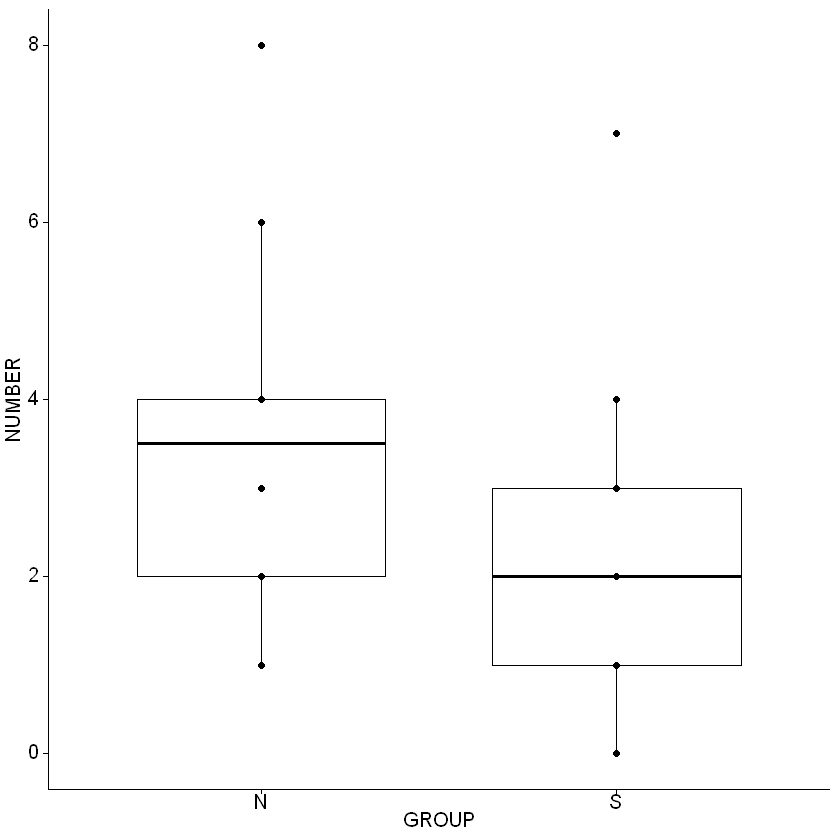

In [50]:
ggboxplot(tat_dat, x="GROUP", y="NUMBER",add="point")

In [51]:
tat_dat %>% identify_outliers(NUMBER)

GROUP,NUMBER,is.outlier,is.extreme
<chr>,<int>,<lgl>,<lgl>
N,8,TRUE,FALSE


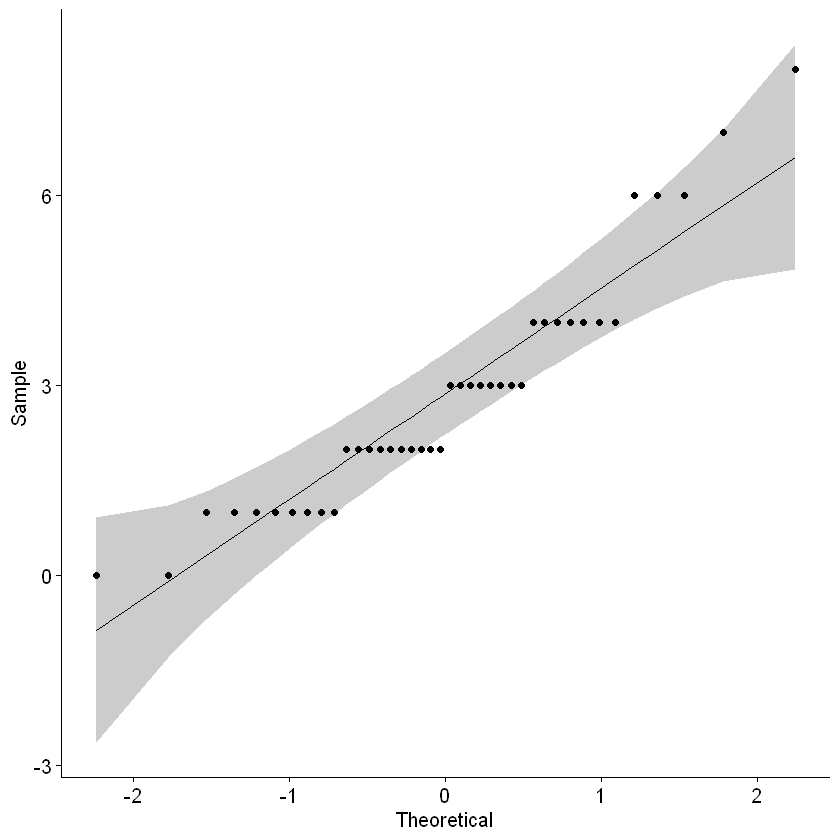

In [52]:
ggqqplot(tat_dat,"NUMBER")

In [53]:
tat_dat %>% shapiro_test(NUMBER)

variable,statistic,p
<chr>,<dbl>,<dbl>
NUMBER,0.9120418,0.004366185


باتوجه به کوچک بودن پی فرض نرمالیتی برقرار نیست

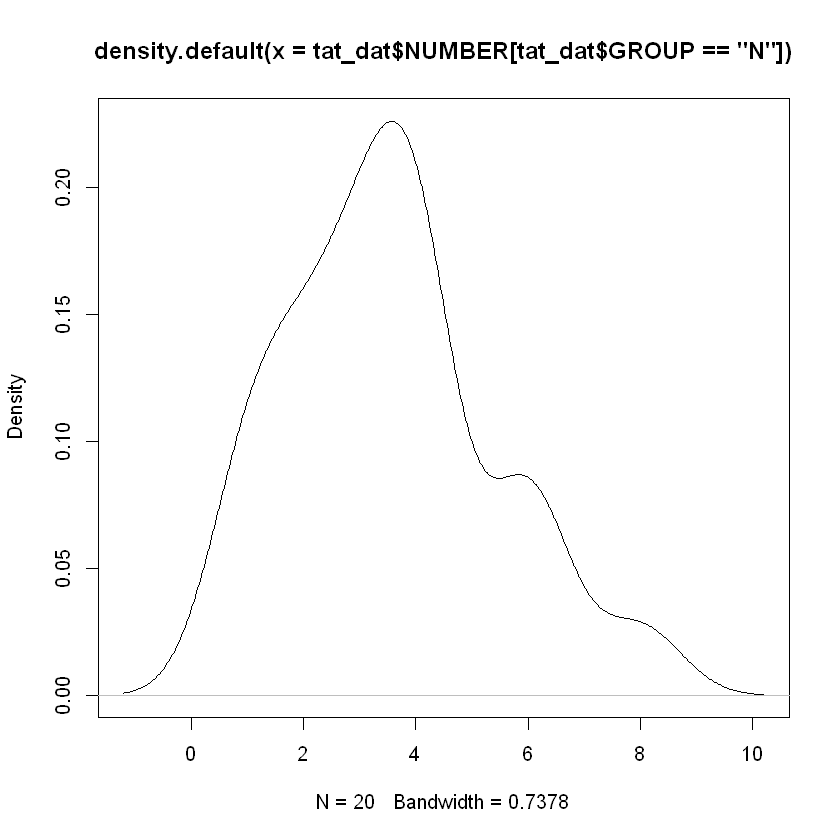

In [59]:
plot(density(tat_dat$NUMBER [tat_dat$GROUP=='N']))

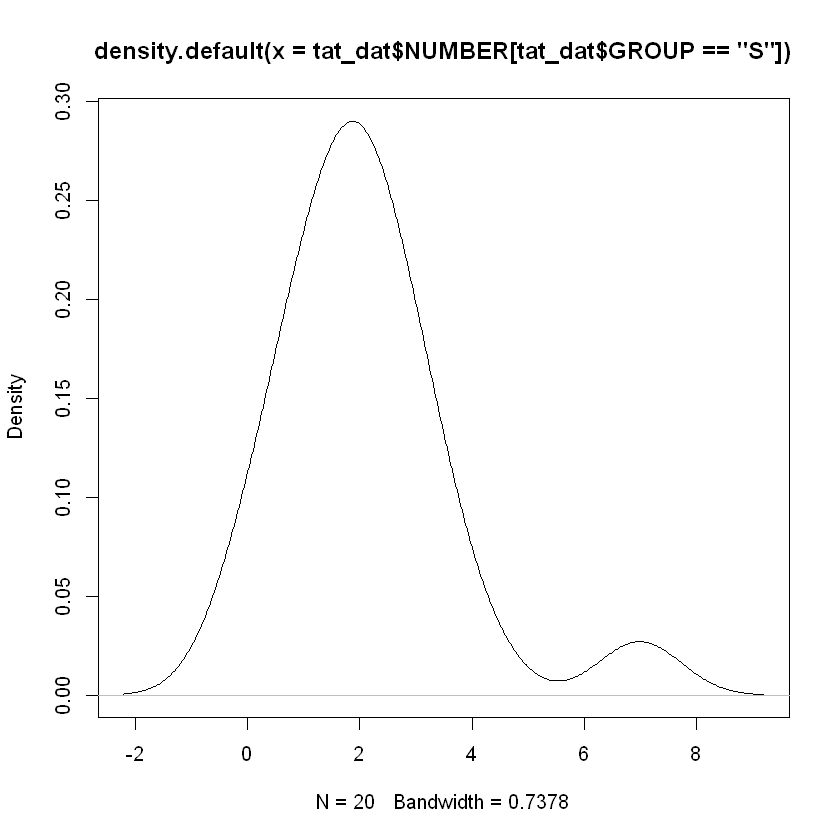

In [60]:
plot(density(tat_dat$NUMBER [tat_dat$GROUP=='S']))

In [63]:
library(lawstat)

In [65]:
symmetry.test(tat_dat$NUMBER [tat_dat$GROUP=='N'])


	m-out-of-n bootstrap symmetry test by Miao, Gel, and Gastwirth (2006)

data:  tat_dat$NUMBER[tat_dat$GROUP == "N"]
Test statistic = 0.16286, p-value = 0.882
alternative hypothesis: the distribution is asymmetric.
sample estimates:
bootstrap optimal m 
                 20 


In [64]:
symmetry.test(tat_dat$NUMBER [tat_dat$GROUP=='S'])


	m-out-of-n bootstrap symmetry test by Miao, Gel, and Gastwirth (2006)

data:  tat_dat$NUMBER[tat_dat$GROUP == "S"]
Test statistic = 0.4723, p-value = 0.706
alternative hypothesis: the distribution is asymmetric.
sample estimates:
bootstrap optimal m 
                 16 


هر دو داده غیر متقارن هستند

In [72]:
tat_dat %>% wilcox_test(NUMBER ~ GROUP)

,.y.,group1,group2,n1,n2,statistic,p
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,NUMBER,N,S,20,20,297,0.00782


به دلیل نرمال نبودن از تست ویلکاکسن استفاده کردیم
مقدار پی کوچک باعث رد شدن فرض صفر می شود. در نتیجه تفاوت بین رابطه والد-کودک در کودکان عادی و اسکیزوفرنیک وجود دارد

In [109]:
confidence_intervals <- t.test(tat_dat$NUMBER[tat_dat$GROUP=='N'], tat_dat$NUMBER[tat_dat$GROUP=='S'], conf.int = TRUE)$conf.int

In [110]:
confidence_intervals

[1] 0.3460137 2.5539863
attr(,"conf.level")
[1] 0.95

In [113]:
mean_diff <- mean(tat_dat$NUMBER[tat_dat$GROUP=='N']) - mean(tat_dat$NUMBER[tat_dat$GROUP=='S'])
pooled_sd <- sqrt(((length(tat_dat$NUMBER[tat_dat$GROUP=='N'])-1)*var(tat_dat$NUMBER[tat_dat$GROUP=='N']) + (length(tat_dat$NUMBER[tat_dat$GROUP=='S'])-1)*var(tat_dat$NUMBER[tat_dat$GROUP=='S']))/(length(tat_dat$NUMBER[tat_dat$GROUP=='N']) + length(tat_dat$NUMBER[tat_dat$GROUP=='S']) - 2))
cohen_d_effect_size <- mean_diff / pooled_sd

In [114]:
cohen_d_effect_size

[1] 0.8417857

مقداراندازه اثر که برابر با 0.841785664057579 (بزرگتر از 0.8 ) است، نشان می دهد که تفاوت استاندارد بین دو گروه، یعنی کودکان نرمال و اسکیزوفرنیک، در رابطهٔ مثبت والد-کودک بسیار قوی است.

با توجه به این مقدار بزرگ، می توان نتیجه گرفت که تفاوت در رابطهٔ مثبت والد-کودک بین این دو گروه به شدت قابل توجه و قوی است. این نتیجه نشان می دهد که در گروه اسکیزوفرنیک، رابطهٔ مثبت والد-کودک به طور قابل توجهی ضعیفتر است نسبت به گروه کودکان نرمال.


# Part C. 
- Brescoll and Uhlmann (2008) investigated the hypothesis that when an observer views a videotape of a male expressing anger as opposed to sadness, the male in the anger condition is accorded higher status than the male in the sadness condition. For 19 males the mean and standard deviation (in parentheses) of the anger condition were 6.47 (2.25). For the 29 men in the sad condition the mean and standard deviation were 4.05 (1.61). Is this difference significant?
- They found the reverse effect for females. They thought that perhaps this latter result was related to the way anger is judged in females compared to males. When they compared judgments of a video of a group of 41 females who expressed anger without an attribution for the source of anger, women’s perceived status had a mean and standard deviation of 3.40 (1.44). When the women on the video gave an external attribution for their anger (an employee stole something), their perceived status had a mean and standard deviation of 5.02 (1.66) with a standard deviation of 1.66.
  - Is this difference significant?
  - What is the effect size?
  - The corresponding means and standard deviations (in parentheses) for males were 5.42 (1.63) in the no-attribution condition and 4.14 (2.46) in the external attribution condition. Do we have evidence of a double standard for males and females?

In [115]:
mean_anger <- 6.47
sd_anger <- 2.25
n_anger <- 19

mean_sadness <- 4.05
sd_sadness <- 1.61
n_sadness <- 29


In [122]:
mean_diff <- mean_anger - mean_sadness

se_diff <- sqrt((sd_anger^2 / n_anger) + (sd_sadness^2 / n_sadness))

t_value <- mean_diff / se_diff

t_value

[1] 4.056897

In [123]:
df <- ((sd_anger^2 / n_anger + sd_sadness^2 / n_sadness)^2) / (((sd_anger^2 / n_anger)^2 / (n_anger - 1)) + ((sd_sadness^2 / n_sadness)^2 / (n_sadness - 1)))

p_value <- 2 * pt(abs(t_value), df = df, lower.tail = FALSE)
p_value

[1] 0.000327478

مقدار تی بزرگ و پی کوچک نشان از تفاوت معنا دار بین دو حالت خشم و غم در مردان دارد

In [124]:
effect_size1 <- (mean_anger - mean_sadness) / sqrt((sd_anger^2 + sd_sadness^2) / 2)
effect_size1


[1] 1.236998

مقدار بزرگ اندازه اثر بر قابل توجه بودن این تفاوت صحه میگذارد

#### Anger without an attribution Vs Anger with an attribution (Females)

فرض صفر : تفاوت معنا داری در میانگین حالت خشم بی دلیل و با دلیل در زنان وجود ندارد

In [125]:
mean_no_attrib_f <- 3.40
sd_no_attrib_f <- 1.44
n_no_attrib_f <- 41

mean_attrib_f <- 5.02
sd_attrib_f <- 1.66
n_attrib_f <- 41


In [157]:
mean_diff_att_f <- mean_attrib_f - mean_no_attrib_f

se_diff_att_f <- sqrt((sd_attrib_f^2 / n_attrib_f) + (sd_no_attrib_f^2 / n_no_attrib_f))

t_value_att_f <- mean_diff_att_f / se_diff_att_f

t_value_att_f

[1] 4.720297

In [129]:
df_att_f <- ((sd_no_attrib_f^2 / n_no_attrib_f + sd_attrib_f^2 / n_attrib_f)^2) / (((sd_no_attrib_f^2 /n_no_attrib_f)^2 / (n_no_attrib_f - 1)) + ((sd_attrib_f^2 / n_attrib_f)^2 / (n_attrib_f - 1)))

p_value_att_f <- 2 * pt(abs(t_value_att_f), df = df_att_f, lower.tail = FALSE)
p_value_att_f

[1] 1.011481e-05

In [132]:
effect_size_att_f <- (mean_attrib_f - mean_no_attrib_f) / sqrt((sd_attrib_f^2 + sd_no_attrib_f^2) / 2)
effect_size_att_f

[1] 1.042539

مقدار تی بالا ، مقدار پی بسیار کوچک در کنار اندازه اثر بزرگ به تفاوت معنا دار خشم بی دلیل و با دلیل، و رد فرض صفر صحه می گذارد.

#### Anger without an attribution Vs Anger with an attribution (Males)

In [158]:
mean_no_attrib_m <-  5.42
sd_no_attrib_m <- 1.63
n_no_attrib_m <- 41

mean_attrib_m <- 4.14 
sd_attrib_m <- 2.46
n_attrib_m <- 41


In [161]:
mean_diff_att_m <- mean_attrib_m - mean_no_attrib_m

se_diff_att_m <- sqrt((sd_attrib_m^2 / n_attrib_m) + (sd_no_attrib_m^2 / n_no_attrib_m))

t_value_att_m <- mean_diff_att_m / se_diff_att_m

t_value_att_m

[1] -2.777347

In [162]:
df_att_m <- ((sd_no_attrib_m^2 / n_no_attrib_m + sd_attrib_m^2 / n_attrib_m)^2) / (((sd_no_attrib_m^2 /n_no_attrib_m)^2 / (n_no_attrib_m - 1)) + ((sd_attrib_m^2 / n_attrib_m)^2 / (n_attrib_m - 1)))
p_value_att_m <- 2 * pt(abs(t_value_att_m), df = df_att_m, lower.tail = FALSE)
p_value_att_m

[1] 0.007040702

In [165]:
effect_size_att_m <- (mean_attrib_m - mean_no_attrib_m) / sqrt((sd_attrib_m^2 + sd_no_attrib_m^2) / 2)
effect_size_att_m

[1] -0.6134134

این تفاوت معنا دار در مردان هم مشاهده می شود. با این تفاوت که رابطه معکوس است: یعنی حالت بی دلیل بالاتر از حالت بی دلیل خشم قرار می گیرد.

# Part D. 
- Two researchers reported on an intervention program for women with abusive partners. The study involved a 10-week intervention program and a three-year follow-up, and used an experimental (intervention) and control group. At the end of the 10-week intervention period the mean quality-of-life score for the intervention group was 5.03 with a standard deviation of 1.01 and a sample size of 135. For the control group the mean was 4.61 with a standard deviation of 1.13 and a sample size of 130. Do these data indicate that the intervention was successful in terms of the quality-of-life measure?
- Calculate a confidence interval for the difference in group means. Then calculate a d-family measure of effect size for that difference.
- Another way to investigate the effectiveness of the intervention described above would be to note that the mean quality-of-life score before the intervention was 4.47 with a standard deviation of 1.18. The quality-of-life score was 5.03 after the intervention with a standard deviation of 1.01. The sample size was 135 at each time. What do these data tell you about the effect of the intervention? (Note: You don’t have the difference scores, but assume that the standard deviation of difference scores was 1.30.)
- For the control condition of the experiment the beginning and 10-week means were 4.32 and 4.61 with standard deviations of 0.98 and 1.13, respectively. The sample size was 130. Using the data from this group and the intervention group, plot the change in pre- to post-test scores for the two groups and interpret what you see. (If you wish the information, the standard deviation of the difference was 1.25.)

In [171]:
mean_intervention <- 5.03
sd_intervention <- 1.01
n_intervention <- 135

In [172]:
mean_control <- 4.61
sd_control <- 1.13
n_control <- 130

In [178]:
mean_diff <- mean_intervention - mean_control

se_diff <- sqrt((sd_intervention^2 / n_intervention) + (sd_control^2 / n_control))

t_value <- mean_diff / se_diff

t_value

[1] 3.185971

In [179]:
df<- ((sd_intervention^2 / n_intervention + sd_control^2 / n_control)^2) / (((sd_intervention^2 /n_intervention)^2 / (n_intervention - 1)) + ((sd_control^2 / n_control)^2 / (n_control - 1)))
p_value <- 2 * pt(abs(t_value), df = df, lower.tail = FALSE)
p_value

[1] 0.001620764

مقدار تی بزرگ و پی کوچک نشان از رد فرض صفر دارد که یعنی تفاوت معنا داری بین دوگروه کنترل و مورد مداخله وجود دارد

In [175]:
ci_diff <- mean_diff + qt(0.025, df = min(n_intervention - 1, n_control - 1)) * se_diff * c(-1, 1)

cat("Confidence Interval for the Difference in Group Means:\n")
print(ci_diff)

Confidence Interval for the Difference in Group Means:
[1] 0.6808248 0.1591752


از آنجایی که فاصله اطمینان صفر را شامل نمی شود، نشان می دهد که بین گروه مداخله و کنترل از نظر معیار کیفیت زندگی تفاوت آماری معنی داری وجود دارد. بنابراین، بر اساس داده ها، مداخله حاکی از موفقیت در بهبود کیفیت زندگی نسبت به گروه کنترل است.

In [176]:
pooled_sd <- sqrt(((n_intervention - 1) * sd_intervention^2 + (n_control - 1) * sd_control^2) / (n_intervention + n_control - 2))

effect_size <- mean_diff / pooled_sd

cat("Effect size (Cohen's d):\n")
print(effect_size)


Effect size (Cohen's d):
[1] 0.3923248


مقدار اندازه اثر 0.3923248 به ما نشان می دهد که تفاوت بین دوگروه کنترل و مداخله با یک اندازهٔ اثر کوچک تا متوسط همراه است. این مقدار نشان می دهد که تأثیر این تفاوت نسبتاً کوچک است. .

#### Pre|Post Intervention

In [148]:
mean_pre_intervention <- 4.47
sd_pre_intervention <- 1.18
n_pre_intervention <- 135

mean_post_intervention <- 5.03
sd_post_intervention <- 1.01
n_post_intervention <- 135

sd_diff <- 1.30

Effect size for the difference in pre- and post-intervention scores (Cohen's d):
[1] 0.9192388


In [180]:
mean_diff_pre_post <- mean_pre_intervention - mean_post_intervention

se_diff_pre_post <- sqrt((sd_pre_intervention^2 / n_pre_intervention) + (sd_post_intervention^2 / n_post_intervention))

t_value_pre_post <- mean_diff_pre_post / se_diff_pre_post

t_value_pre_post

[1] -4.189105

In [183]:
df_pre_post<- ((sd_pre_intervention^2 / n_pre_intervention + sd_post_intervention^2 / n_post_intervention)^2) / (((sd_pre_intervention^2 /n_pre_intervention)^2 / (n_pre_intervention - 1)) + ((sd_post_intervention^2 / n_post_intervention)^2 / (n_post_intervention - 1)))
p_value_pre_post <- 2 * pt(abs(t_value_pre_post), df = df_pre_post, lower.tail = FALSE)
p_value_pre_post

[1] 3.831318e-05

In [193]:
pooled_sd_pre_post <- sqrt(((n_pre_intervention - 1) * sd_pre_intervention^2 + (n_post_intervention - 1) * sd_post_intervention^2) / (n_pre_intervention + n_post_intervention - 2))

effect_size_pre_post <- mean_diff_pre_post / pooled_sd_pre_post

cat("Effect size (Cohen's d):\n")
print(effect_size_pre_post)


Effect size (Cohen's d):
[1] -0.5098816


مقدار تی بزرگ و پی کوچک در کنار اندازه اثر متوسط به تفاوت مداخله در حالت پیش و پس و رد  فرض صفر منجر می شود

In [196]:
mean_control_pre <- 4.32
mean_control_post <- 4.61
sd_control_diff <- 1.25
n_control_diff <- 130

In [194]:
intervention_diff <- mean_post_intervention - mean_pre_intervention
control_diff <- mean_control_post - mean_control_pre

In [218]:
diff_data <- data.frame(
  Group = c(rep("Intervention", 2), rep("Control", 2)),
  Score = c(mean_pre_intervention, mean_post_intervention, mean_control_pre, mean_control_post),
  Time = rep(c("Pre", "Post"), each = 1)
)
diff_data

Group,Score,Time
<chr>,<dbl>,<chr>
Intervention,4.47,Pre
Intervention,5.03,Post
Control,4.32,Pre
Control,4.61,Post


In [226]:
# Control group data
mean_control_pre <- 4.32
mean_control_post <- 4.61
n_control_diff <- 130

# Intervention group data
mean_intervention_pre <- 4.47
mean_intervention_post <- 5.03
n_intervention_diff <- 135

In [227]:
# Calculate the change in scores for control and intervention groups
diff_control <- mean_control_post - mean_control_pre
diff_intervention <- mean_intervention_post - mean_intervention_pre

# Standard deviation of the difference
sd_diff <- 1.25

In [228]:

# Create a data frame
diff_data <- data.frame(
  Group = c("Control", "Intervention"),
  Change = c(diff_control, diff_intervention)
)
diff_data

Group,Change
<chr>,<dbl>
Control,0.29
Intervention,0.56


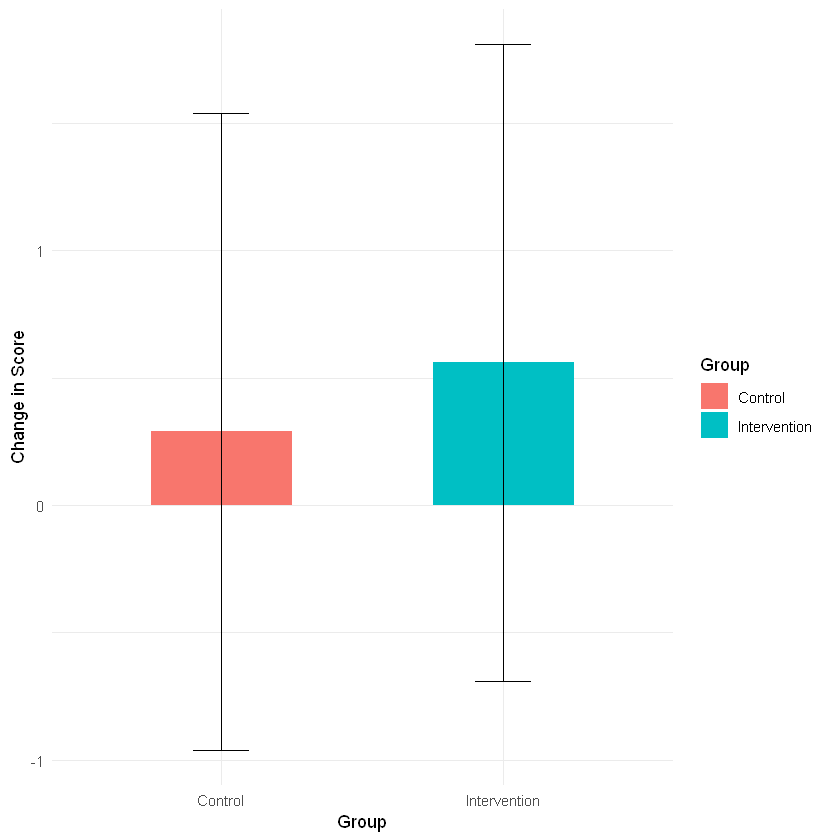

In [230]:
# Plot the data
ggplot(diff_data, aes(x = Group, y = Change, fill = Group)) +
  geom_bar(stat = "identity", width = 0.5) +
  geom_errorbar(aes(ymin = Change - sd_diff, ymax = Change + sd_diff), width = 0.2, color = "black") +
  labs(x = "Group", y = "Change in Score", fill = "Group") +
  theme_minimal()


همانطور که مشخص است دامنه تغییرات در حالت مداخله بیشتر از کنترل است. هم چنین میانگین مداخله بیشتر از کنترل است. این امر نشان دهنده تاثیر مثبت مداخله بر امتیازات نهایی است